In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns

source_path = os.path.abspath("../source/")
sys.path.append(source_path)
import utils as ut
import plotting as plt2
import hypercore as hc
import matrix as matrix

In [8]:
# load the population data
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/population_pore_c/chr1_1000000_incidence.csv"

df = pd.read_csv(fpath)
df = df.set_index('bin')
print(f"{df.shape=}")

bins = list(df.index) # extract!
df.head()

df.shape=(193, 122676)


,43007,53640,76962,52235,15070,71405,3901,90398,95986,107241,...,27615,44016,114747,15472,52555,53887,37027,35466,65072,114226
bin,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
reload(ut)
# load the single-cell data
dpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/sc_porec/"

sc_data = {}

for f in os.listdir(dpath):
    fpath = f"{dpath}{f}"
    cell_id = f.split("_")[0]
    
    pdf = pd.read_csv(fpath)
    pdf = pdf.set_index('bin')
    print(f"{cell_id} {pdf.shape=}")
    
    pdf = ut.drop_non_unique_columns(pdf)
    pdf = ut.fill_missing_bins(pdf, bins) # for consistency
    sc_data[cell_id] = pdf
    
print('done!')

o1b08 pdf.shape=(186, 2185)
o2b74 pdf.shape=(152, 188)
o3b95 pdf.shape=(174, 621)
o3b19 pdf.shape=(182, 692)
o1b24 pdf.shape=(171, 1554)
o3b10 pdf.shape=(143, 347)
o3b94 pdf.shape=(177, 834)
o2b68 pdf.shape=(2, 1)
o3b11 pdf.shape=(168, 338)
o3b68 pdf.shape=(88, 36)
o2b75 pdf.shape=(143, 132)
o2b72 pdf.shape=(63, 39)
o2b69 pdf.shape=(156, 218)
o1b25 pdf.shape=(188, 3555)
o3b20 pdf.shape=(168, 594)
o1b07 pdf.shape=(181, 939)
o1b27 pdf.shape=(183, 1981)
o1b26 pdf.shape=(152, 231)
done!


Text(0.5, 1.0, 'Sample of 500 Hyperedges from Single Cell Pore-C (o1b25)')

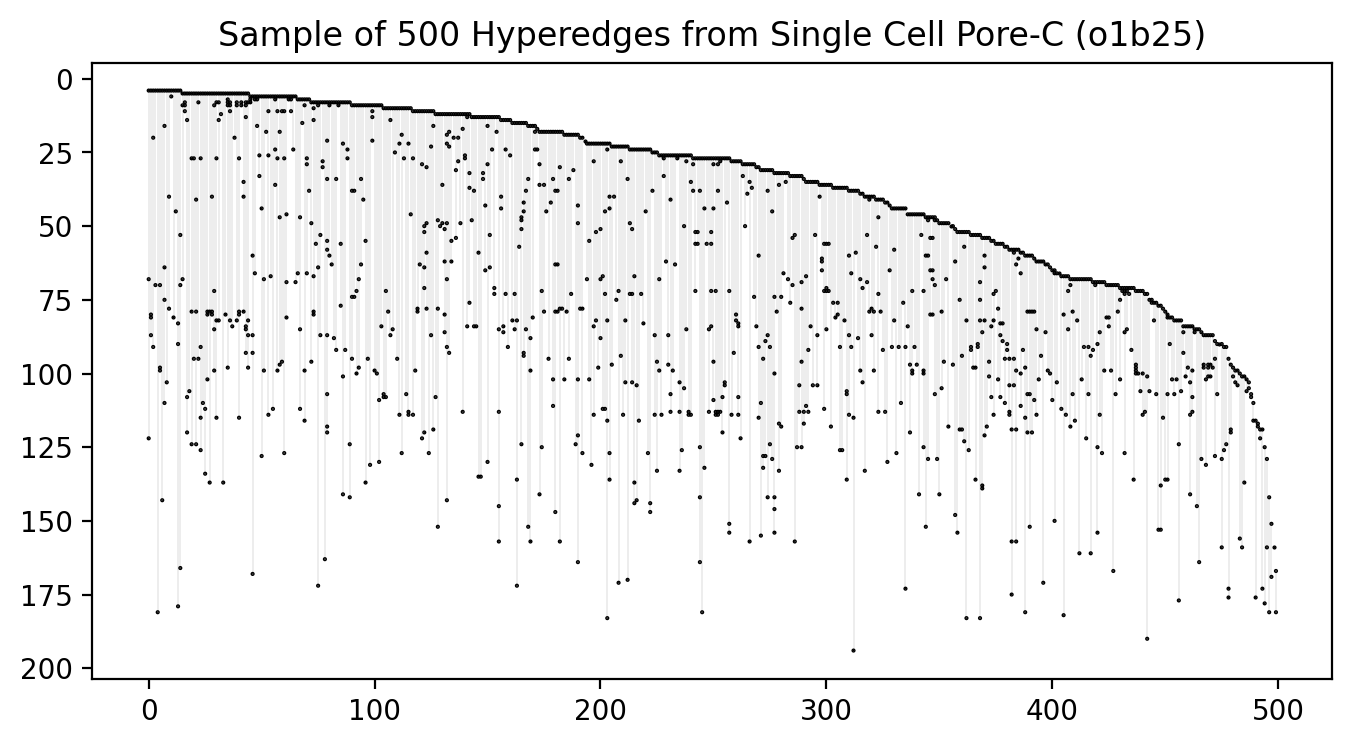

In [28]:
node_params = {
    's' : 1,
    'ec' : 'k',
    'lw' : 1,
    'marker' : ".",
    'zorder' : 2,
}

line_params = {
    'lw' : 0.1,
    'alpha' : 0.5,
    'zorder' : 1,
}

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8, 4

sample_size = 500
cell_id = "o1b25"
I = sc_data[cell_id]
plt2.plot_incidence(ut.sort_by_lowest_index(I.T.sample(sample_size).T), 
               node_color='k',
               node_params=node_params,
               line_params=line_params)

plt.title(f"Sample of {sample_size} Hyperedges from Single Cell Pore-C ({cell_id})")

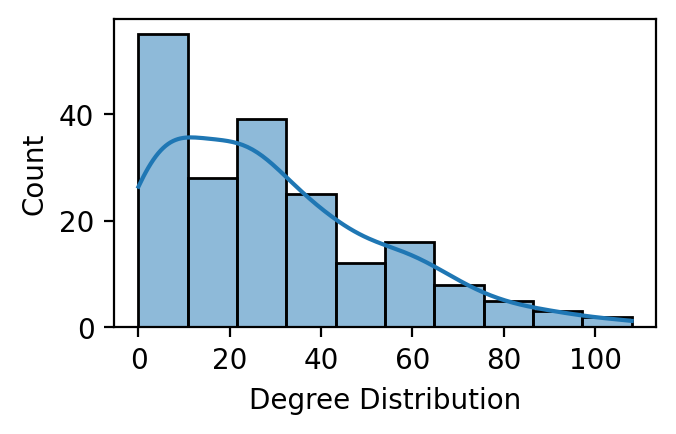

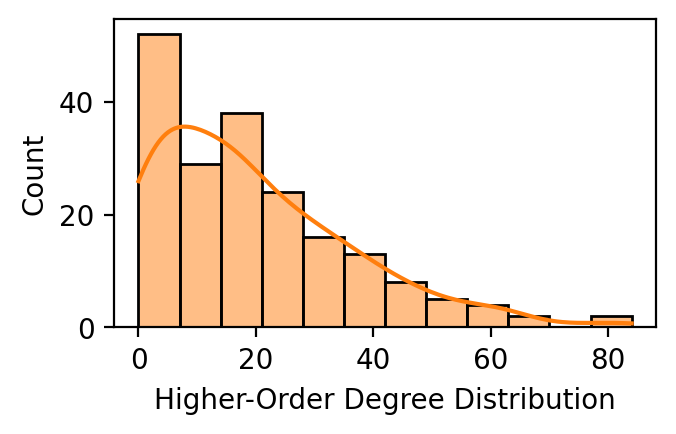

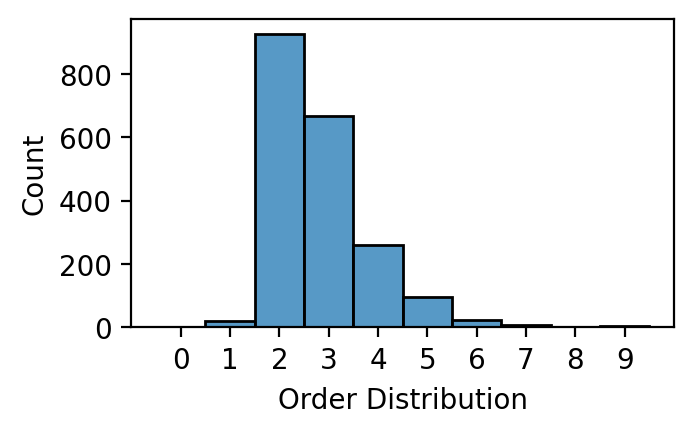

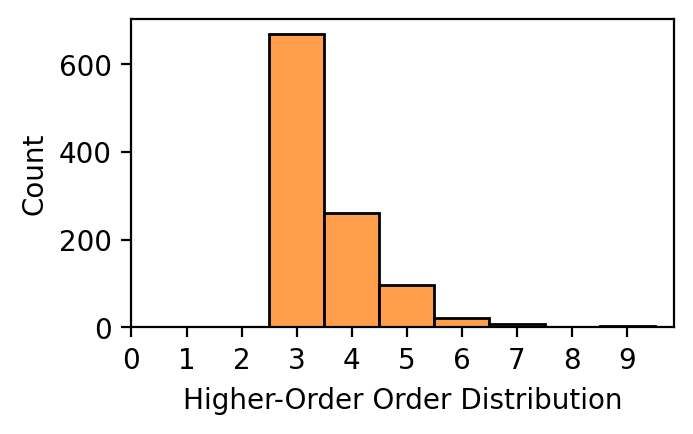

In [30]:
degrees = I.sum(axis=1)
orders = I.sum(axis=0)

# get the degree of higher order contacts
high_order_idx = np.argwhere(orders.values > 2).ravel()
ho_degrees = I[I.columns[high_order_idx]].sum(axis=1)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3.5, 2

sns.histplot(x=degrees,
             kde=True)

plt.xlabel('Degree Distribution')
plt.show()

sns.histplot(x=ho_degrees,
             kde=True,
             color="C1")

plt.xlabel('Higher-Order Degree Distribution')
plt.show()



sns.histplot(x=orders,
             discrete=True)

plt.gca().set_xticks(sorted(np.unique(orders)))
plt.xlabel('Order Distribution')
plt.show()


sns.histplot(x=orders[orders.values > 2],
             discrete=True,
             color="C1")

plt.gca().set_xticks(sorted(np.unique(orders)))
plt.xlabel('Higher-Order Order Distribution')
plt.show()


In [33]:
res = []

n_nodes, n_edges = I.shape
orders = I.sum(axis=0)
high_order_idx = np.argwhere(orders.values > 3).ravel()
ho_degrees = I[I.columns[high_order_idx]].sum(axis=1)

data = ut.incidence_to_list_of_list(I)
data = hc.prepare_for_hypercore_decomp(data, k=2)

M = list(range(3, 10))
K = list(range(1, 15, 2))

for k in K:
    for m in M:
        mk_hyper = hc.m_k_decomposition(data, m, k)
        
        row = {
            'm' : m,
            'k' : k,
            'nodes' : len(mk_hyper.nodes) / n_nodes ,
            'edges' : len(mk_hyper.edges) / n_edges,
        }
        res.append(row)
        
res = pd.DataFrame(res)
res.head()

,m,k,nodes,edges
0,3,1,0.948187,0.528415
1,4,1,0.880829,0.195414
2,5,1,0.818653,0.065304
3,6,1,0.554404,0.016949
4,7,1,0.373057,0.005982


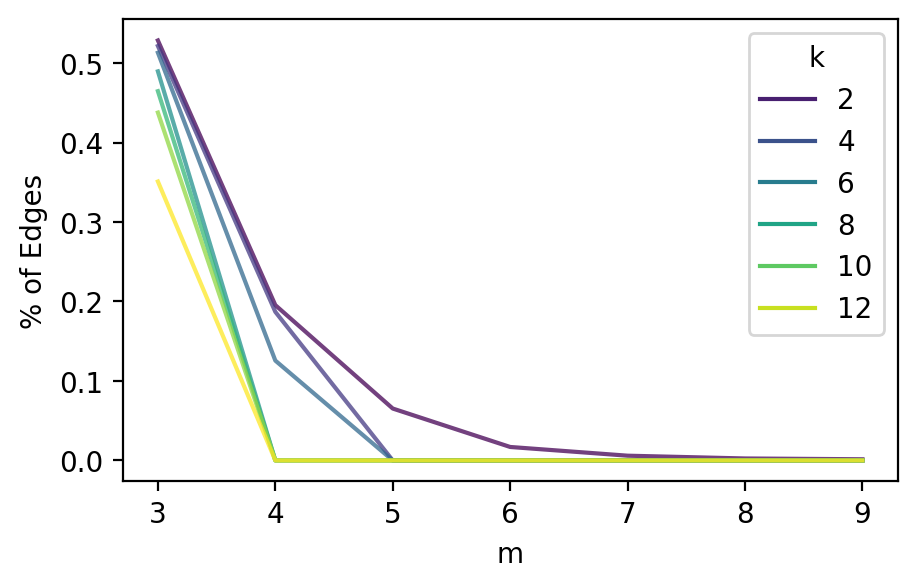

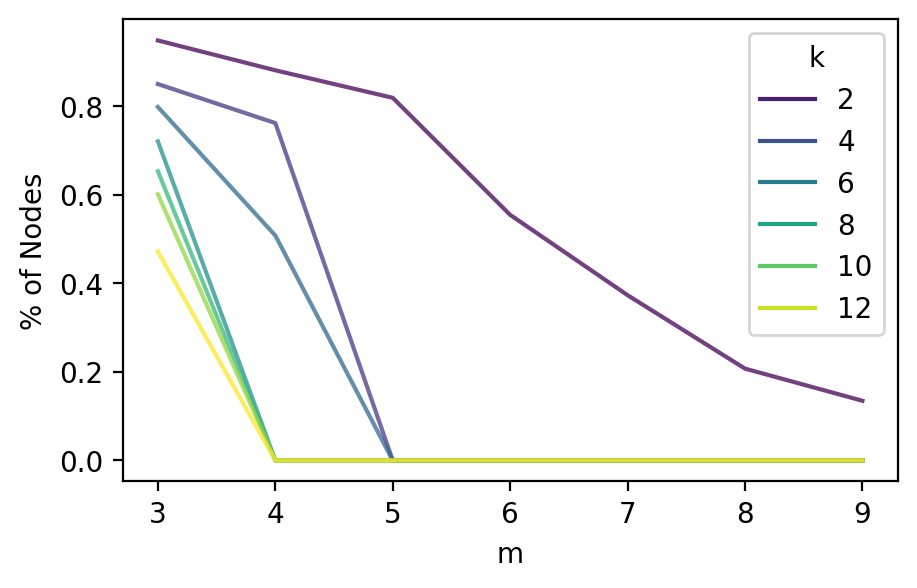

In [34]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 3

sns.lineplot(data=res, 
             x='m',
             y='edges',
             hue='k',
             alpha=0.75,
             palette='viridis')

plt.ylabel("% of Edges")
plt.show()

sns.lineplot(data=res, 
             x='m',
             y='nodes',
             hue='k',
             alpha=0.75,
             palette='viridis')

plt.ylabel("% of Nodes")
plt.show()

Unnamed Hypergraph with 96 nodes and 741 hyperedges


Text(0.5, 1.0, 'All Hyperedges from (3, 12)-Core (single-cell)')

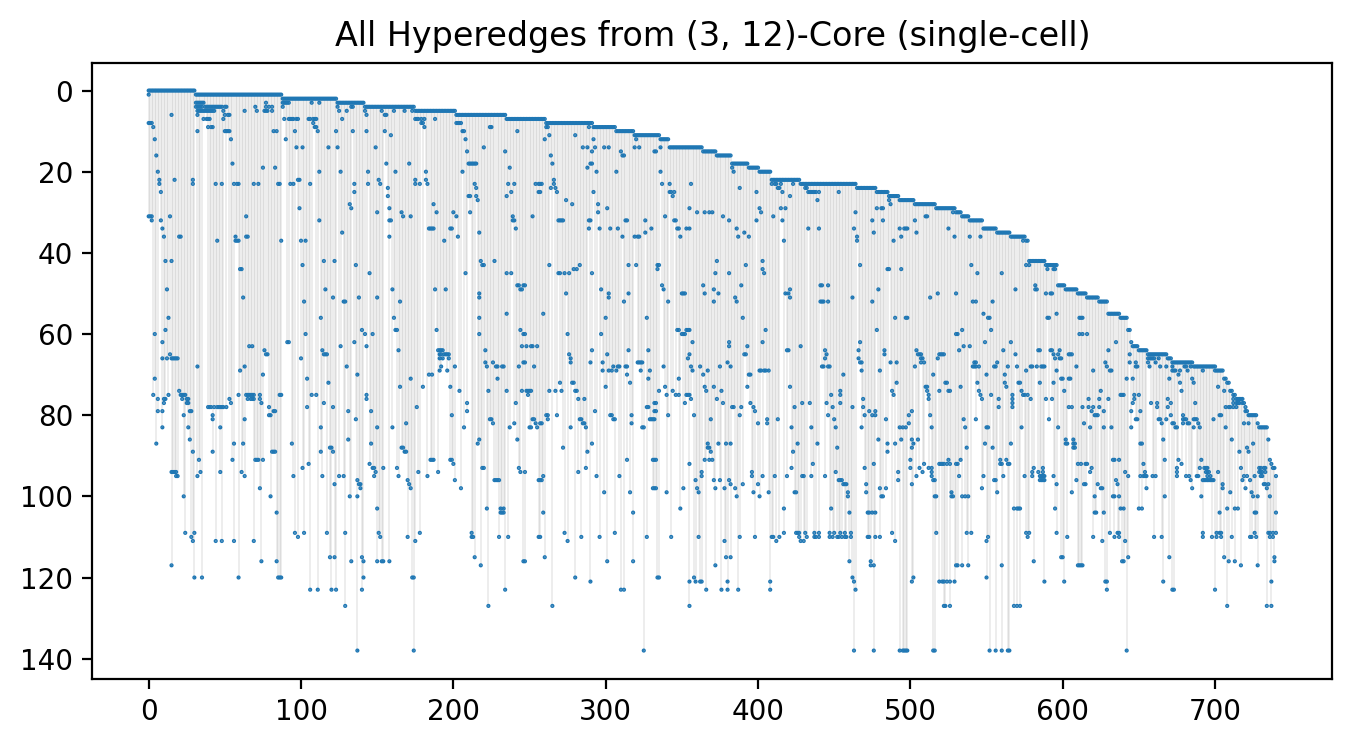

In [38]:
m = 3
k = 12
mk_hyper = hc.m_k_decomposition(data, m, k)
print(mk_hyper)
Ihat = hc.xgi_to_incidence(mk_hyper)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8, 4

node_params = {
    's' : 1,
    'ec' : 'C0',
    'lw' : 1,
    'marker' : ".",
    'zorder' : 2,
}

line_params = {
    'lw' : 0.1,
    'alpha' : 0.5,
    'zorder' : 1,
}

plt2.plot_incidence(ut.sort_by_lowest_index(Ihat), 
               node_color='C0',
               node_params=node_params,
               line_params=line_params)

plt.title(f"All Hyperedges from {m, k}-Core (single-cell)")

# Hypergraph distances

In [42]:
print(df.shape)
print(I.shape)

(193, 122676)
(193, 2006)


In [45]:
from scipy.spatial.distance import cdist

X = df.T.copy()
Y = I.T.copy()

print(f"{X.shape=}")
print(f"{Y.shape=}")

D = cdist(X, Y, metric='jaccard')
D.shape

X.shape=(122676, 193)
Y.shape=(2006, 193)


(122676, 2006)

<Axes: ylabel='Count'>

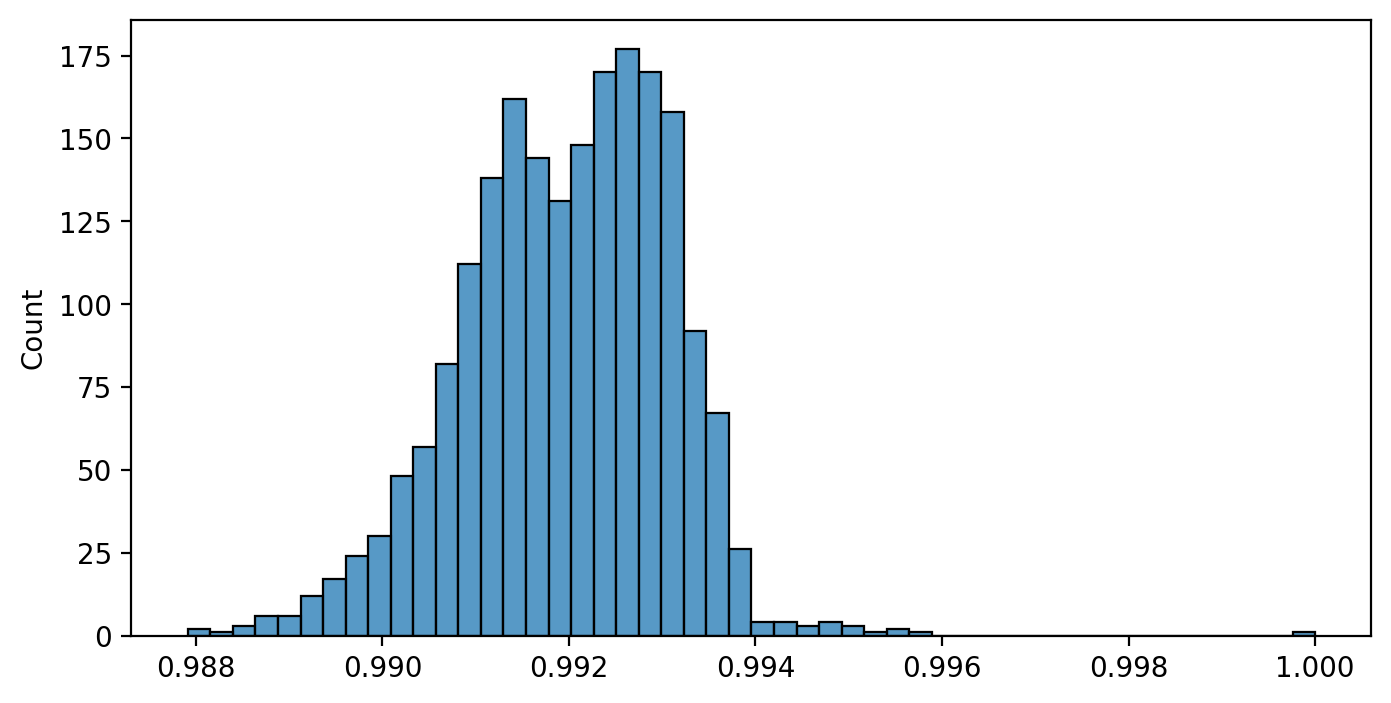

In [48]:
sc_dists = D.mean(axis=0)

sns.histplot(sc_dists)

<Axes: ylabel='Count'>

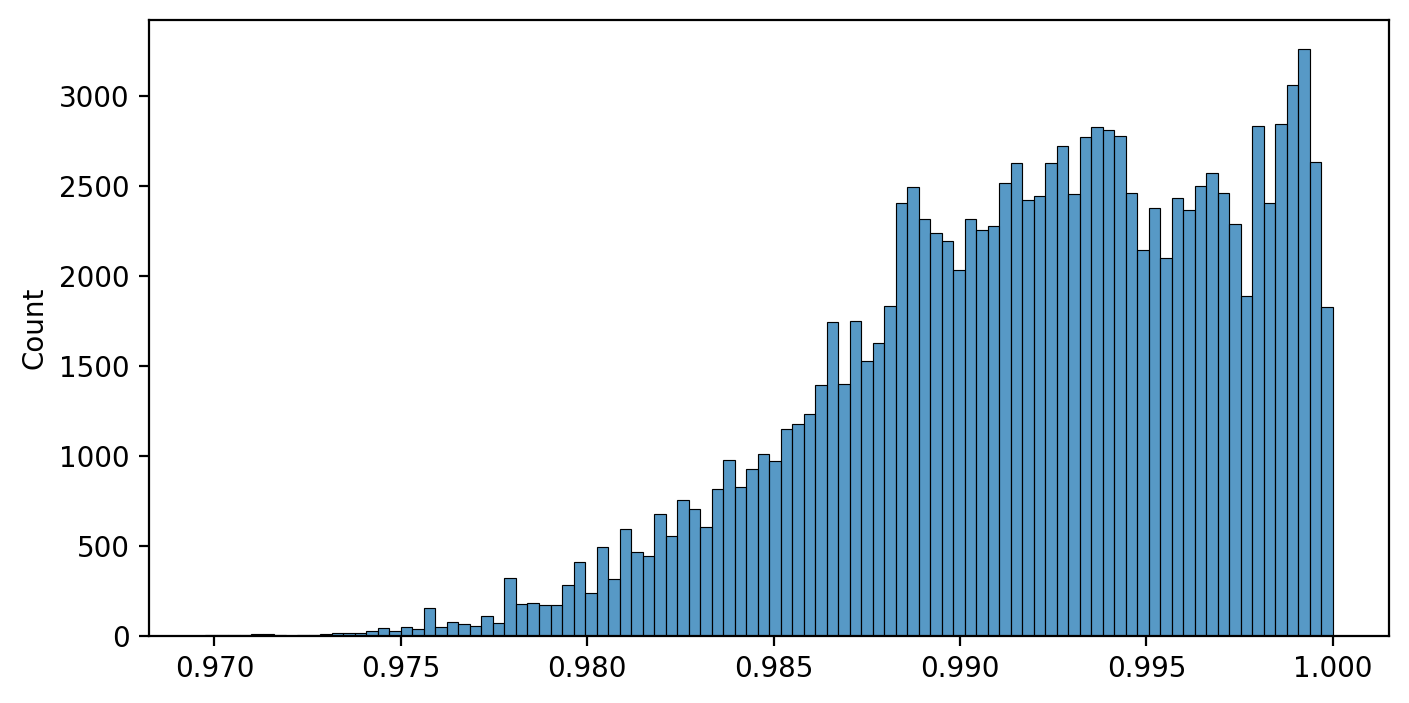

In [49]:
pop_dists = D.mean(axis=1)

sns.histplot(pop_dists)